# Código

Algorítimo Genético para ajuste da função

$$ y = a + bx + cx^2$$

**Aluno**: Iran Freitas Ribeiro

**Matrícula**: 2021241588

**Disciplina**: Computação Natural

**Professor**: Renato Antonio Kroling

Código adaptado de [Simple Genetic Algorithm](https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/) por Jason Brownlee

In [24]:
# genetic algorithm search for continuous function optimization
import numpy as np
from numpy.lib.npyio import load
from numpy.random import randint
from numpy.random import rand
import pandas as pd
import matplotlib.pyplot as plt

# objective function
def objective(v, x):
    y = v[0] + v[1]*x + v[2]*(x**2)
    return y

# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])
        # convert string to integer
        integer = int(chars, 2)
        # scale integer to desired range
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        # store
        decoded.append(value)
    return decoded

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

def eval(v, X, Y):
    # valores produzidos pelo indivíduo
    y_hat = np.array([objective(v, x) for x in X])    
    # soma do erro médio quadrático
    mse = (np.square(Y - y_hat)).mean()
    return mse

def load_file(filename):
    file = open(filename, 'r')
    data = file.readlines()
    return np.array(data, dtype='float')


# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, X, Y):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    v = decode(bounds, n_bits, pop[0])
    # keep track of best solution
    best, best_eval = 0, eval(v,X,Y)
    # enumerate generations
    for gen in range(n_iter):
        # decode population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [eval(d, X, Y) for d in decoded]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                # apenas visualiza a execução em cada geração
                print (">{}, new best: f({}) = {}".format(gen, decoded[i], scores[i]))
                # print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

# Experimentos

10 execuções do algorítimo genético com os parâmetros:


- Taxa de crossover = 90%
- Tamanho da população: 100
- Taxa de mutação: ~0.02

In [3]:
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
# num_experiments
n_exp = 10

# loads data
x_data = load_file("x_data.txt")
y_data = load_file("y_data.txt")

list_parameters = list()
list_best_results = list()

for i in range(n_exp): 
    # perform the genetic algorithm search
    best, score = genetic_algorithm(objective, bounds, n_bits, n_iter,
                                    n_pop, r_cross, r_mut, x_data, y_data)
    decoded = decode(bounds, n_bits, best)
    list_parameters.append(decoded)
    list_best_results.append(score)   

>0, new best: f([0.758819580078125, -2.466888427734375, 0.6719970703125]) = 4.952958262316535
>0, new best: f([-0.96649169921875, 3.4136962890625, -1.410369873046875]) = 2.832478274504274
>0, new best: f([-0.53436279296875, 2.410736083984375, -0.93994140625]) = 1.2324912034525222
>1, new best: f([-0.06500244140625, 2.410736083984375, -0.93994140625]) = 0.6098945960864067
>1, new best: f([0.867462158203125, 0.054168701171875, 0.205230712890625]) = 0.5089858211694267
>2, new best: f([1.734161376953125, 0.037078857421875, -0.01708984375]) = 0.4053231339382081
>2, new best: f([0.867462158203125, 0.054168701171875, 0.172882080078125]) = 0.3502027557590829
>4, new best: f([1.109161376953125, 0.078582763671875, -0.1275634765625]) = 0.25621458866048963
>5, new best: f([0.8648681640625, 0.054168701171875, 0.054473876953125]) = 0.06269986151252828
>8, new best: f([0.391998291015625, 1.143646240234375, -0.28350830078125]) = 0.029311310646452607
>9, new best: f([0.391998291015625, 1.14364624023437

>20, new best: f([1.043548583984375, 0.083160400390625, 0.002593994140625]) = 0.0440302463478453
>21, new best: f([0.95794677734375, 0.142059326171875, 0.002899169921875]) = 0.04255276738256127
>22, new best: f([0.923004150390625, 0.141754150390625, 0.00335693359375]) = 0.04153914404010619
>25, new best: f([0.90087890625, 0.155792236328125, 0.000152587890625]) = 0.040857762358223554
>27, new best: f([0.91094970703125, 0.152130126953125, 0.00030517578125]) = 0.040747931954397215
>30, new best: f([0.926361083984375, 0.152435302734375, 0.0]) = 0.04070628782253697
>31, new best: f([0.921630859375, 0.152435302734375, 0.000152587890625]) = 0.040695850021991366
>31, new best: f([0.91888427734375, 0.149688720703125, 0.000152587890625]) = 0.040627947136557145
>33, new best: f([0.931396484375, 0.146636962890625, 0.000152587890625]) = 0.040623475985026414
>34, new best: f([0.92803955078125, 0.146636962890625, 0.000152587890625]) = 0.04059396255908579
>36, new best: f([0.919647216796875, 0.1472473

>14, new best: f([1.44012451171875, -0.63995361328125, 0.207366943359375]) = 0.13855596034985185
>14, new best: f([1.149139404296875, -0.373687744140625, 0.153961181640625]) = 0.10473660452707682
>35, new best: f([1.292724609375, -0.320587158203125, 0.147705078125]) = 0.10406549101540395
>37, new best: f([1.28387451171875, -0.34027099609375, 0.149078369140625]) = 0.09878964874728095
>39, new best: f([1.29364013671875, -0.179290771484375, 0.09063720703125]) = 0.09424769217766345
>43, new best: f([1.27410888671875, -0.3173828125, 0.133209228515625]) = 0.09100608017657774
>61, new best: f([1.27349853515625, -0.3173828125, 0.131988525390625]) = 0.09041072636429477
>62, new best: f([1.27105712890625, -0.3228759765625, 0.131988525390625]) = 0.09000804164293377
>64, new best: f([1.27105712890625, -0.3228759765625, 0.12237548828125]) = 0.08840907545307722
>65, new best: f([1.27349853515625, -0.3173828125, 0.12359619140625]) = 0.08809422052738797
>66, new best: f([1.25213623046875, -0.317382812

# Resultados

## Resultado geral
Geração da tabela com o resultado geral dos experimentos

As colunas **a**, **b** e **c** são os parâmetros ajustados em cada experimento

A coluna **errors** representa o erro médio do ajuste dos melhores parâmetros de cada experimento

In [15]:
## construção da tabela de resultados
# melhores parâmetros a, b, c
a = np.array(list_parameters)[:,0]
b = np.array(list_parameters)[:,1]
c = np.array(list_parameters)[:,2]
# erro resultante dos respectivos parâmetros
error = list_best_results

dict_results = {
    'a': a,
    'b': b,
    'c': c,
    'errors':list_best_results
}

df_results = pd.DataFrame(dict_results)
df_results

,a,b,c,errors
0,0.391998,1.143646,-0.284882,0.027481
1,0.472565,1.253052,-0.381775,0.007475
2,-0.215912,2.628784,-0.830841,0.140660
3,0.625000,0.780640,-0.214844,0.002968
4,0.935974,0.139465,0.000000,0.040512
5,0.625000,1.001740,-0.312653,0.006201
6,0.535126,0.956726,-0.273438,0.000215
7,1.250458,-0.312653,0.122375,0.086906
8,0.634918,-0.004120,0.073853,0.154563
9,0.236511,1.291351,-0.352478,0.009485


## Melhor resultado
Tabela com os parâmetros que obtiveram os melhores resultados

In [54]:
# melhor resultado = menor valor na coluna errors
idx_best = df_results['errors'].argmin()
best_result = df_results[['a','b','c','errors']][idx_best:idx_best+1]
best_result

,a,b,c,errors
6,0.535126,0.956726,-0.273438,0.000215


## Média dos resultados

Tabela com a média dos parâmetros e dos erros de cada uma das 10 execuções

In [36]:
mean_results = df_results.mean()
mean_results

a         0.549164
b         0.887863
c        -0.245468
errors    0.047647
dtype: float64

a | b | c | errors
--|-- |-- |--
0.549164 | 0.887863 | -0.245468 | 0.047647

## Gráfico da curva

Gráfico da curva gerada a partir dos melhores parâmetros e da média dos parâmetros para as 10 execuções

In [29]:
def function(a,b,c,x):
    fx = a + b*x + c*(x**2)
    return fx

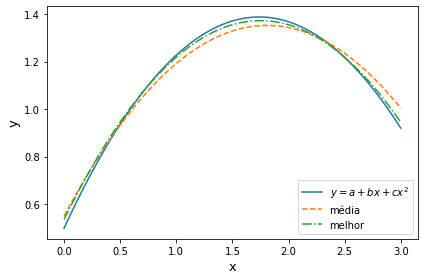

In [60]:
## Média de todos os parâmetros
# média parâmetro a
a_mean = mean_results.a
# média parâmetro b
b_mean = mean_results.b
# média parâmetro c
c_mean = mean_results.c

## Parâmetros a, b, c que obtiveram os melhores resultados
a_best = best_result.a
b_best = best_result.b
c_best = best_result.c

# Plot da figura
fig, ax = plt.subplots()
fx_hat_mean = [function(a_mean, b_mean, c_mean, x) for x in x_data]    
fx_hat_best = [function(a_best, b_best, c_best, x) for x in x_data]    
ax.plot(x_data, y_data, label='$y = a + bx + cx^2$')
ax.plot(x_data, fx_hat_mean, label='média', ls='--')
ax.plot(x_data, fx_hat_best, label='melhor', ls='-.')
ax.set_xlabel("x", fontdict={'fontsize':13})
ax.set_ylabel("y", fontdict={'fontsize':13})
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()
plt.close()